In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import math

In [2]:
dataset = pd.read_csv('data/train.csv')
dataset.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [3]:
print dataset.shape

(1460, 81)


In [4]:
#for column in list(dataset.columns.values):
#    print dataset[column].value_counts()
to_go_through = ['LotConfig', 'Neighborhood', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
                 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
                'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
                'KitchenQual', 'Functional',  'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
                'GarageCond', 'PavedDrive', 'YrSold', 'SaleCondition']
len(to_go_through)

32

In [5]:
#Dropping Utilities and Street. Dropping Alley, LandSlope, MiscFeature due to not enough data Not enough variability to make a difference in the model. 
del dataset['Utilities']
del dataset['Street']
del dataset['Alley']
del dataset['LandSlope']
del dataset['PoolQC']
del dataset['MiscFeature']
del dataset['Condition1']
del dataset['Condition2']

In [6]:
def code_HouseStyle(value):
    '''Reassign Single Family to 1 and 0 for all else'''
    if value == '1Story':
        return 1
    else:
        return 0
dataset['HouseStyle'] = dataset['HouseStyle'].apply(code_HouseStyle)

In [7]:
def code_BldgType(value):
    '''Reassign Single Family to 1 and 0 for all else'''
    if value == '1Fam':
        return 1
    else:
        return 0
dataset['BldgType'] = dataset['BldgType'].apply(code_BldgType)

In [8]:
def code_lot_shape(value):
    '''Reassign Reg to 0 and 1 for all Irregular'''
    if value == 'Reg':
        return 0
    else:
        return 1
dataset['LotShape'] = dataset['LotShape'].apply(code_lot_shape)

In [9]:
def code_zoning(value):
    '''Reassign all residential to 0 and 1 for all else'''
    if value[0] == 'R':
        return 0
    else:
        return 1
#dataset['MSZoning'].apply(code_zoning)
dataset['MSZoning'] = dataset['MSZoning'].apply(code_zoning)

In [10]:
def contour(value):
    '''Reassign all level to 0 and 1 for all else'''
    if value == 'Lvl':
        return 0
    else:
        return 1
dataset['LandContour'] = dataset['LandContour'].apply(contour)

In [11]:
def saletype(value):
    '''Reassign all new to 1 and 0 for all else'''
    if value == 'New':
        return 1
    else:
        return 0

dataset['SaleType'] = dataset['SaleType'].apply(saletype)

In [12]:
def fence(value):
    '''If there is a fence assign 1 and 0 for all else'''
    if type(value) == float:
        return 0
    elif value[0] == 'G' or value[0] == 'M' or value == 1:
        return 1
    else:
        return 0
dataset['Fence'] = dataset['Fence'].apply(fence)

In [13]:
del dataset['Id']
dataset.head()

MSSubClass  MSZoning  LotFrontage  LotArea  LotShape  LandContour  \
0          60         0         65.0     8450         0            0   
1          20         0         80.0     9600         0            0   
2          60         0         68.0    11250         1            0   
3          70         0         60.0     9550         1            0   
4          60         0         84.0    14260         1            0   

  LotConfig Neighborhood  BldgType  HouseStyle    ...      3SsnPorch  \
0    Inside      CollgCr         1           0    ...              0   
1       FR2      Veenker         1           1    ...              0   
2    Inside      CollgCr         1           0    ...              0   
3    Corner      Crawfor         1           0    ...              0   
4       FR2      NoRidge         1           0    ...              0   

   ScreenPorch  PoolArea  Fence MiscVal MoSold YrSold SaleType SaleCondition  \
0            0         0      0       0      2   2008        0        Normal   
1            0         0      0       0      5   2007        0        Normal   
2            0         0      0       0      9   2008        0        Normal   
3            0         0      0       0      2   2006        0       Abnorml   
4            0         0      0       0     12   2008        0        Normal   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 72 columns]

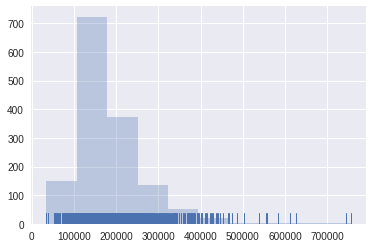

In [14]:
plt.hist(dataset['SalePrice'], alpha=.3)
sns.rugplot(dataset['SalePrice'])

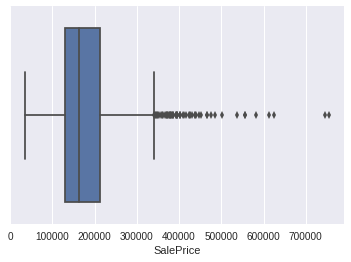

In [15]:
sns.boxplot(dataset.SalePrice)

In [16]:
#Given there is only 1400 rows of data, the dataset needs to be reduced down to only 14 attributes (at the most).
#To identify good items to keep, I'll first find the items correlated with the target (SalePrice).

LotFrontage      0.351799
LotArea          0.263843
LotShape         0.267672
OverallQual      0.790982
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
GrLivArea        0.708624
FullBath         0.560664
HalfBath         0.284108
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431

In [182]:
dataset_reduced = dataset.filter(['SalePrice', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'YearBuilt ',
                          'YearRemodAdd', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 
                          'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea'])
dataset_reduced.head()

SalePrice  LotFrontage  LotArea  LotShape  OverallQual  YearRemodAdd  \
0     208500         65.0     8450         0            7          2003   
1     181500         80.0     9600         0            6          1976   
2     223500         68.0    11250         1            7          2002   
3     140000         60.0     9550         1            7          1970   
4     250000         84.0    14260         1            8          2000   

   MasVnrArea  TotalBsmtSF  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  \
0       196.0          856       856       854       1710         2         1   
1         0.0         1262      1262         0       1262         2         0   
2       162.0          920       920       866       1786         2         1   
3         0.0          756       961       756       1717         1         0   
4       350.0         1145      1145      1053       2198         2         1   

   TotRmsAbvGrd  Fireplaces  GarageYrBlt  GarageCars  GarageArea  
0             8           0       2003.0           2         548  
1             6           1       1976.0           2         460  
2             6           1       2001.0           2         608  
3             7           1       1998.0           3         642  
4             9           1       2000.0           3         836

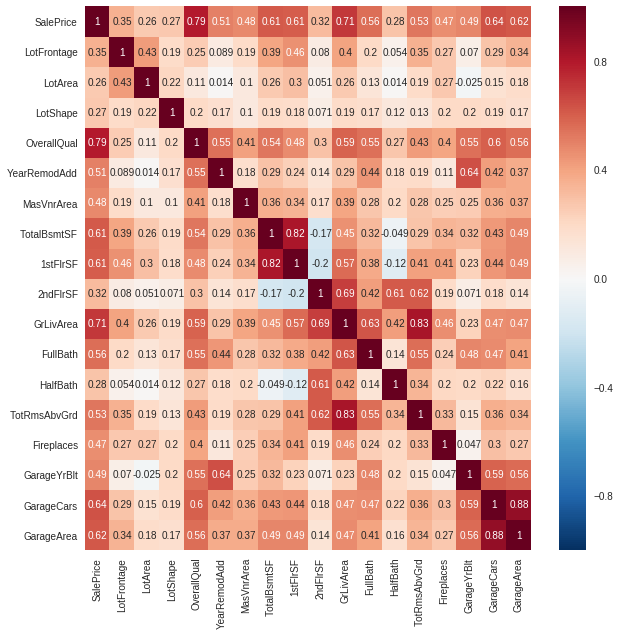

In [183]:
correlated = dataset_reduced.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(correlated[list(correlated)].T, annot=True, ax=ax)

In [184]:
i = 0
for item in correlated[0:1]:
    if item == 'SalePrice':
        print correlated[item]

SalePrice       1.000000
LotFrontage     0.351799
LotArea         0.263843
LotShape        0.267672
OverallQual     0.790982
YearRemodAdd    0.507101
MasVnrArea      0.477493
TotalBsmtSF     0.613581
1stFlrSF        0.605852
2ndFlrSF        0.319334
GrLivArea       0.708624
FullBath        0.560664
HalfBath        0.284108
TotRmsAbvGrd    0.533723
Fireplaces      0.466929
GarageYrBlt     0.486362
GarageCars      0.640409
GarageArea      0.623431
Name: SalePrice, dtype: float64


Based on the Correlation of the entities, Garage Area and Garage Cars are highly correlated. The dataset will run better by removing this and using the more continuous value (GarageArea). Garage Area will cover if there are multiple garages. We can also do the same for GrLivArea and TotRmsAbvGrd. We will keep the GrLivArea entity. TotalBsmtSF and 1stFlrSF are also highly Correlated. We will keep 1stFlrSF for modeling. 

In [185]:
del dataset_reduced['GarageCars']
del dataset_reduced['TotRmsAbvGrd']
del dataset_reduced['TotalBsmtSF']
dataset_reduced.head()

SalePrice  LotFrontage  LotArea  LotShape  OverallQual  YearRemodAdd  \
0     208500         65.0     8450         0            7          2003   
1     181500         80.0     9600         0            6          1976   
2     223500         68.0    11250         1            7          2002   
3     140000         60.0     9550         1            7          1970   
4     250000         84.0    14260         1            8          2000   

   MasVnrArea  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  Fireplaces  \
0       196.0       856       854       1710         2         1           0   
1         0.0      1262         0       1262         2         0           1   
2       162.0       920       866       1786         2         1           1   
3         0.0       961       756       1717         1         0           1   
4       350.0      1145      1053       2198         2         1           1   

   GarageYrBlt  GarageArea  
0       2003.0         548  
1       1976.0         460  
2       2001.0         608  
3       1998.0         642  
4       2000.0         836

In [186]:
dataset_reduced.shape

(1460, 15)

In [187]:
#Make year Garage Built a discrete value
dataset_reduced['GarageOldYears'] = 2011 - dataset_reduced['GarageYrBlt']
del dataset_reduced['GarageYrBlt']


In [188]:
dataset_reduced['YearRemodAdd'] = 2011 - dataset_reduced['YearRemodAdd']
dataset_reduced.head()

SalePrice  LotFrontage  LotArea  LotShape  OverallQual  YearRemodAdd  \
0     208500         65.0     8450         0            7             8   
1     181500         80.0     9600         0            6            35   
2     223500         68.0    11250         1            7             9   
3     140000         60.0     9550         1            7            41   
4     250000         84.0    14260         1            8            11   

   MasVnrArea  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  HalfBath  Fireplaces  \
0       196.0       856       854       1710         2         1           0   
1         0.0      1262         0       1262         2         0           1   
2       162.0       920       866       1786         2         1           1   
3         0.0       961       756       1717         1         0           1   
4       350.0      1145      1053       2198         2         1           1   

   GarageArea  GarageOldYears  
0         548             8.0  
1         460            35.0  
2         608            10.0  
3         642            13.0  
4         836            11.0

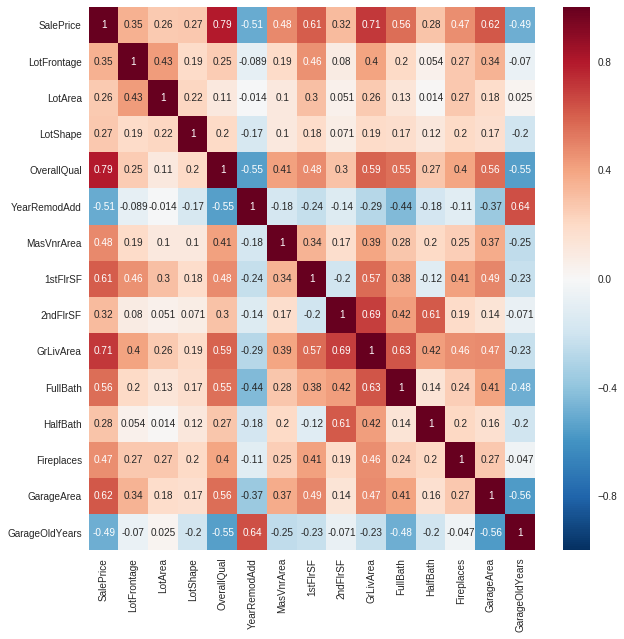

In [189]:
correlated = dataset_reduced.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(correlated[list(correlated)].T, annot=True, ax=ax)

It makes sense to remove HalfBath and Lot Shape given their correlation is about 25% with Sale Price. I will still keep Lot Area for the first round of modeling.

In [190]:
del dataset_reduced['HalfBath']
del dataset_reduced['LotShape']

In [191]:
#One last problem, LotFrontage, GarageOldYears contains many NaN values. 
#To fix for modeling, I will impute with the Average of the remaning values.
LF_mean = dataset_reduced['LotFrontage'].mean()
dataset_reduced['LotFrontage'].fillna(LF_mean, inplace=True)
dataset_reduced['GarageOldYears'].fillna(0, inplace=True)
dataset_reduced['MasVnrArea'].fillna(0, inplace=True)
pd.isnull(dataset_reduced).any(1).nonzero()[0]

array([], dtype=int64)

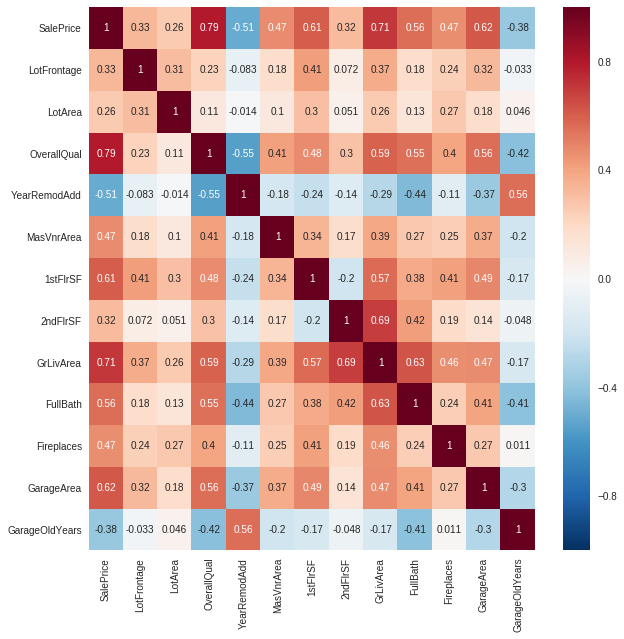

In [192]:
correlated = dataset_reduced.corr()
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(correlated[list(correlated)].T, annot=True, ax=ax)

Let's start with a simple linear regression to determine the Least Squares and how the predictors attribute to Sale Price

In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset_reduced.drop('SalePrice', axis=1), dataset_reduced['SalePrice'], test_size=0.4)

In [62]:
columns = X_train.columns
columns

Index([u'LotFrontage', u'LotArea', u'OverallQual', u'YearRemodAdd',
       u'MasVnrArea', u'1stFlrSF', u'2ndFlrSF', u'GrLivArea', u'FullBath',
       u'Fireplaces', u'GarageArea', u'GarageOldYears'],
      dtype='object')

In [63]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)

In [64]:
coef = lr.coef_
intercept = lr.intercept_

print 'The coefficient for this model is:', coef
print 'The intercept for this model is:', intercept
print '**********The score for training is***********\n', lr.score(X_train, Y_train)
print '**********The score for testing is***********\n', lr.score(X_test, Y_test)

The coefficient for this model is: [ -8.24029935e+01   7.14226118e-01   2.11702635e+04  -4.24386521e+02
   3.63146247e+01   4.46778345e+01   2.69544951e+01   2.29544397e+00
  -2.34367532e+02   9.39911977e+03   4.94788527e+01  -2.02794051e+02]
The intercept for this model is: -31144.0373324
**********The score for training is***********
0.751268766359
**********The score for testing is***********
0.801578759182


Overall this model had R Square of 75% Training and 80% against the Test dataset. Here is how the model is estimated: 



u'LotFrontage', u'LotArea', u'OverallQual', u'YearRemodAdd',
       u'MasVnrArea', u'1stFlrSF', u'2ndFlrSF', u'GrLivArea', u'FullBath',
       u'Fireplaces', u'GarageArea', u'GarageOldYears'],
      dtype='object')



In [207]:
#Let's calulate the Mean Square Error using plain old Python
#This is what you want to minimize using Deep Learning or Machine Learning
def mse(predictions, actual):
    if len(predictions) != len(actual):
        return 'The length of your predictions must equal the length of your actuals'
    else:
        #Square each error result
        errors = []
        for i in range(len(predictions)):
            errors.append((float(predictions[i]) - float(actual[i]))**2)
        loss_sum = 0
        for i in range(len(errors)):
            loss_sum += errors[i]
        return loss_sum / len(errors)
print(mse(predictions, list(Y_test)), math.sqrt(mse(predictions, list(Y_test))))

(1694686277.5507798, 41166.5674735067)


In [103]:
from sklearn.metrics import mean_squared_error
errors = mean_squared_error(predictions, list(Y_test))
errors

1466718927.5796702

In [147]:
def test_mse():
    from sklearn.metrics import mean_squared_error
    y_true = [1.0, 2.0, 3.0]
    y_pred = [3.0, 6.0, 7.0]
    try:
        assert mse(y_true, y_pred) == 12
        print('Test Passed')
    except:
        print('Test Failed')
test_mse()

Test Passed


With a high MSE and only an .80 R Squared it is worth relooking at the attributes in the model. The next thing to do will be to look at a scatter plot of each of the values with Sale Price to determine if the attribute should be kept in the model. 

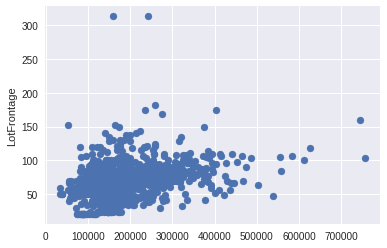

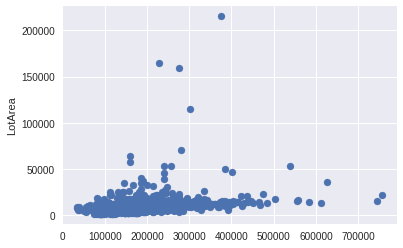

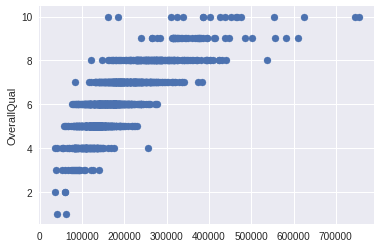

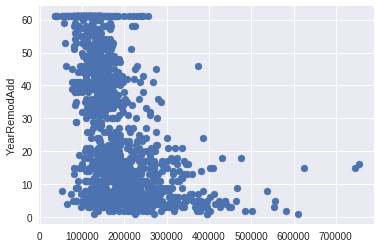

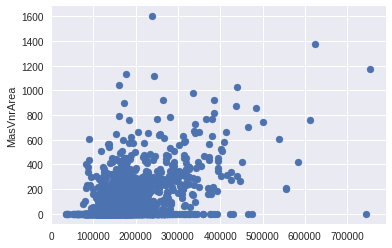

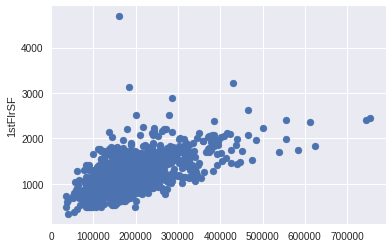

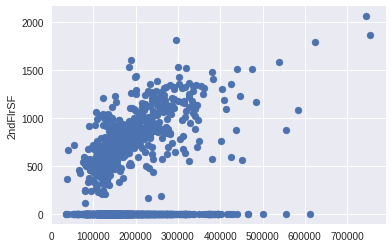

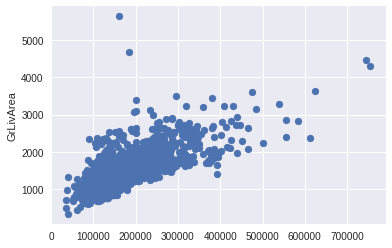

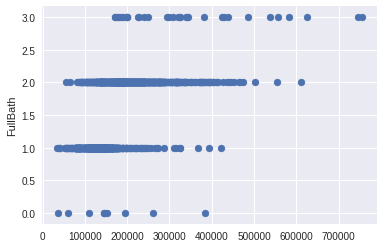

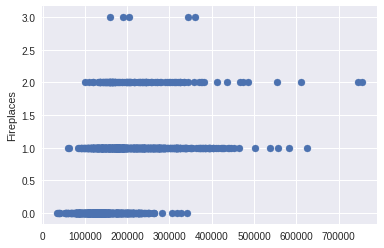

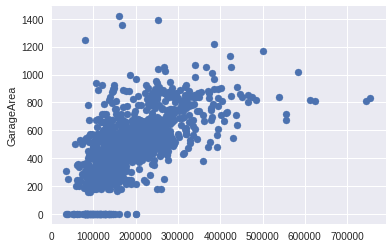

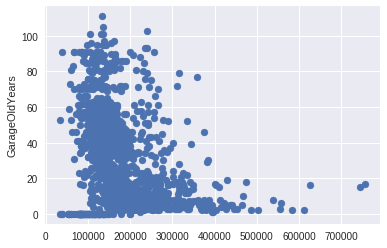

In [171]:
columns = list(columns)
i = 0
for value in columns:
    plt.scatter(dataset_reduced.SalePrice, dataset_reduced[value])
    plt.ylabel(value)
    i += 1
    plt.show()

OverallQual, 1rstFlrSF, 2ndFlrSF, GrLivArea, FullBath, Fireplaces, and GarageAreas are the only attributes which look like there is a linear relationship. This makes sense given square footage, number of bedrooms, number of bathrooms are typically what real estate agents marke the most when listing a home. The next step will be to reduce the dataset down again and rerun the regression. 

In [175]:
del dataset_reduced['LotFrontage']
del dataset_reduced['LotArea']
del dataset_reduced['YearRemodAdd']
del dataset_reduced['MasVnrArea']
del dataset_reduced['GarageOldYears']
dataset_reduced.head()

SalePrice  OverallQual  1stFlrSF  2ndFlrSF  GrLivArea  FullBath  \
0     208500            7       856       854       1710         2   
1     181500            6      1262         0       1262         2   
2     223500            7       920       866       1786         2   
3     140000            7       961       756       1717         1   
4     250000            8      1145      1053       2198         2   

   Fireplaces  GarageArea  
0           0         548  
1           1         460  
2           1         608  
3           1         642  
4           1         836

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset_reduced.drop('SalePrice', axis=1), dataset_reduced['SalePrice'], test_size=0.4)

In [177]:
lr = LinearRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)

In [178]:
coef = lr.coef_
intercept = lr.intercept_

print 'The coefficient for this model is:', coef
print 'The intercept for this model is:', intercept
print '**********The score for training is***********\n', lr.score(X_train, Y_train)
print '**********The score for testing is***********\n', lr.score(X_test, Y_test)

The coefficient for this model is: [  2.49332229e+04   6.54642789e+01   4.40933957e+01  -1.16265027e+01
   2.86638696e+03   1.15683908e+04   6.46935240e+01]
The intercept for this model is: -87505.7082082
**********The score for training is***********
0.746410987947
**********The score for testing is***********
0.765875592266


In [206]:
import math
meansquare = mse(predictions, list(Y_test))
math.sqrt(meansquare)

41166.5674735067

Reducing the number of attributes in the model has made the model worse. What if we readd the attributes back into the model and try using a Deep Learning Feed Forward Neural Network.

In [193]:
dataset_reduced.head()

SalePrice  LotFrontage  LotArea  OverallQual  YearRemodAdd  MasVnrArea  \
0     208500         65.0     8450            7             8       196.0   
1     181500         80.0     9600            6            35         0.0   
2     223500         68.0    11250            7             9       162.0   
3     140000         60.0     9550            7            41         0.0   
4     250000         84.0    14260            8            11       350.0   

   1stFlrSF  2ndFlrSF  GrLivArea  FullBath  Fireplaces  GarageArea  \
0       856       854       1710         2           0         548   
1      1262         0       1262         2           1         460   
2       920       866       1786         2           1         608   
3       961       756       1717         1           1         642   
4      1145      1053       2198         2           1         836   

   GarageOldYears  
0             8.0  
1            35.0  
2            10.0  
3            13.0  
4            11.0

In [194]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [205]:
data = dataset_reduced.values
y = data[:,0]
X = data[:,1:12]

In [217]:
def baseline_model():
    model = Sequential()
    model.add(Dense(11, input_dim=11, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [218]:
#Set Random Seed to Reproduce Results
seed = 42
np.random.seed(seed)
regressor = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5)

In [219]:
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(regressor, X, y, cv=kfold)


In [221]:
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))
print('Estimated Loss: %.2f') % math.sqrt(results.mean())

Results: 5607382144.55 (10210010270.30) MSE
Estimated Loss: 74882.46


In [222]:
def deeper_model():
    model = Sequential()
    model.add(Dense(100, input_dim=11, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [223]:
regressor_deeper = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=5)
results_deeper = cross_val_score(regressor_deeper, X, y, cv=kfold)

Epoch 1/100
1314/1314 [==============================] - 0s - loss: 33476912240.9985      
Epoch 2/100
1314/1314 [==============================] - 0s - loss: 23284660672.4871     

In [224]:
print("Results: %.2f (%.2f) MSE" % (results_deeper.mean(), results_deeper.std()))
print('Estimated Loss: %.2f') % math.sqrt(results_deeper.mean())

Results: 2184278332.09 (1028660380.36) MSE
Estimated Loss: 46736.26


Results are now getting a getting closer to the best linear regression loss. Let's try expanding the batch size from 5 to 100. This will result in weight updates every 100 datapoints instead of every 5 datapoints.

In [225]:
regressor_bbatch = KerasRegressor(build_fn=baseline_model, nb_epoch=100, batch_size=100)
results_bbatch = cross_val_score(regressor_deeper, X, y, cv=kfold)

Epoch 1/100
1314/1314 [==============================] - 0s - loss: 35964705071.1476      
Epoch 2/100
1314/1314 [==============================] - 0s - loss: 26040155312.1218     

In [226]:
print("Results: %.2f (%.2f) MSE" % (results_bbatch.mean(), results_bbatch.std()))
print('Estimated Loss: %.2f') % math.sqrt(results_bbatch.mean())

Results: 2197105657.71 (1017414720.83) MSE
Estimated Loss: 46873.29


The results from using a bigger batch made no improvement (actually made it worse.) One of the other suggestions was to use a standardized Pipeline of the estimators. Let's try this approach and use the deeper model.

In [229]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deeper_model, nb_epoch=100, batch_size=5)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results = cross_val_score(pipeline, X, y, cv=kfold)
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))
print("Average Loss: %.2f" % math.sqrt(results.mean()))

Epoch 1/100
1314/1314 [==============================] - 0s - loss: 39386527695.6834      
Epoch 2/100
1314/1314 [==============================] - 0s - loss: 37913450941.7595      

In [230]:
print("Standardized: %.2f (%.2f) MSE" % (results.mean(), results.std()))
print("Average Loss: %.2f" % math.sqrt(results.mean()))

Standardized: 1352781703.64 (874197963.55) MSE
Average Loss: 36780.18


Now we are making some progress. The MSE is still high, but we are moving in the right direction. Next step will be to look at a 3 hidden layer model and use a pipeline of standardized estimators. 

In [231]:
def deep3_model():
    model = Sequential()
    model.add(Dense(100, input_dim=11, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [232]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deep3_model, nb_epoch=100, batch_size=5)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_deep3 = cross_val_score(pipeline, X, y, cv=kfold)


Epoch 1/100
1314/1314 [==============================] - 0s - loss: 36462679433.5464       
Epoch 2/100
1314/1314 [==============================] - 0s - loss: 8336705248.8280      

In [233]:
print("Standardized: %.2f (%.2f) MSE" % (results_deep3.mean(), results_deep3.std()))
print("Average Loss: %.2f" % math.sqrt(results_deep3.mean()))

Standardized: 1354291111.14 (857980893.54) MSE
Average Loss: 36800.69


Adding additional hidden layers makes no improvement. The deeper_model is the best so far. What if we went wider (200 nodes per hidden layer)?

In [234]:
def deep_wide_model():
    model = Sequential()
    model.add(Dense(200, input_dim=11, activation='relu'))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [235]:
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasRegressor(build_fn=deep_wide_model, nb_epoch=100, batch_size=5, verbose=0)))
pipeline = Pipeline(estimators)
kfold = KFold(n_splits=10, random_state=seed)
results_deep_wide = cross_val_score(pipeline, X, y, cv=kfold)

In [236]:
print("Standardized: %.2f (%.2f) MSE" % (results_deep_wide.mean(), results_deep_wide.std()))
print("Average Loss: %.2f" % math.sqrt(results_deep_wide.mean()))

Standardized: 1344279318.12 (873029414.49) MSE
Average Loss: 36664.41


MSE goes down, but not by much. Overall this model generalizes a price estimate within 36k-37k. This isn't a great prediction. However, the prediction is better than the best linear regression prediction.